# ND Rejection Sampling

## 2D

In [97]:
import sys
sys.path.append("../../")
from pyACC.sampler import Rejection_Sampling

import numpy as np
import matplotlib.pyplot as plt

Distributions:
- bivariate Gaussian distribution
- multivariate Gaussian distribution with mean vector *mu* and covariance matrix *cov*

In [98]:
#target distribution (2D)
def target_distribution_2D(x):
    #x=[x1, x2]
    x1, x2 = x[0], x[1]
    return np.exp(-x1**2/2) * np.exp(-x2**2/2) / (2*np.pi)

#proposal distribution (2D)
def proposal_distribution_2D(x, mu=[0, 0], cov=[[1, 0], [0, 1]]):
    det = np.linalg.det(cov)
    norm_factor = 1 / (2 * np.pi * np.sqrt(det))
    x_minus_mu = np.array(x) - np.array(mu)[:, None, None]  #so that mu has the shape of x
    x_minus_mu_transposed = np.transpose(x_minus_mu, axes=(1, 2, 0))  #transpose to shape (100, 100, 2)
    exponent = -0.5 * np.einsum('ijk,kl,ijl->ij', x_minus_mu_transposed, np.linalg.inv(cov), x_minus_mu_transposed)
    return norm_factor * np.exp(exponent)

Plot

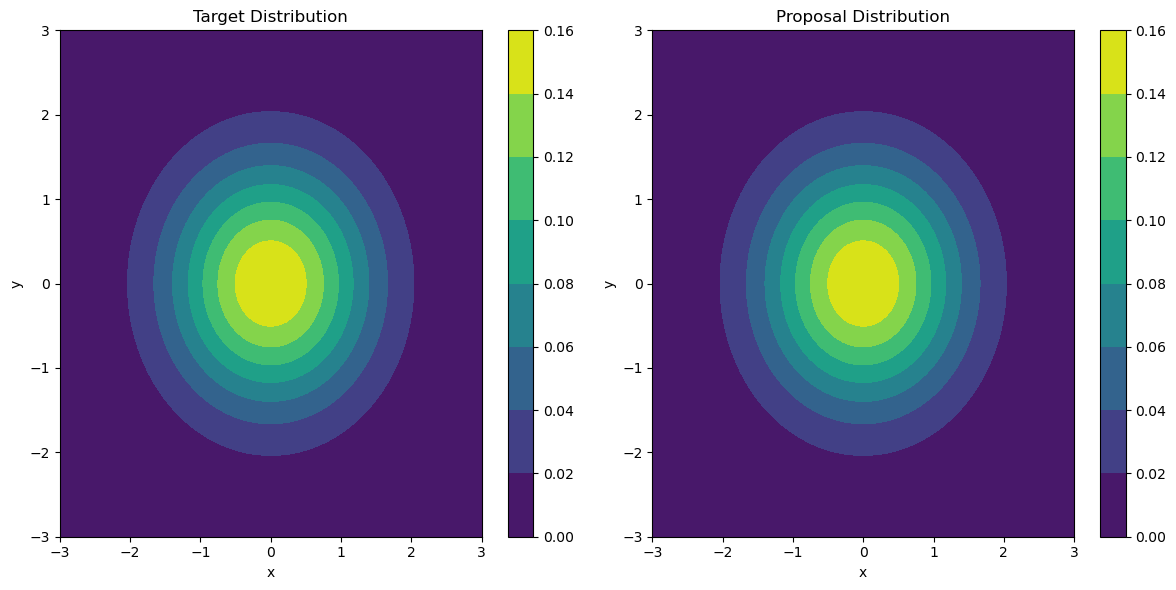

In [99]:
#x and y values
x_values_2D = np.linspace(-3, 3, 100)
y_values_2D = np.linspace(-3, 3, 100)
X_2D, Y_2D = np.meshgrid(x_values_2D, y_values_2D)
Z_target_2D = target_distribution_2D([X_2D, Y_2D])
Z_proposal_2D = proposal_distribution_2D([X_2D, Y_2D])

#plot of the target and proposal distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(X_2D, Y_2D, Z_target_2D, cmap='viridis')
plt.title('Target Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(X_2D, Y_2D, Z_proposal_2D, cmap='viridis')
plt.title('Proposal Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.tight_layout()
plt.show()

Rejection sampling

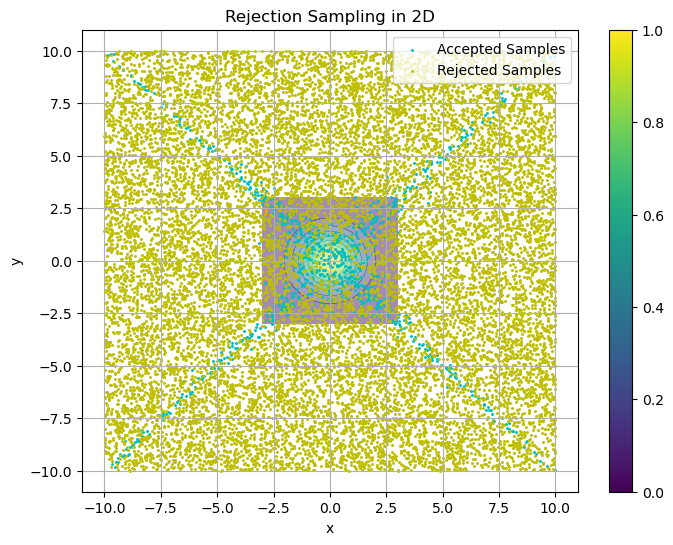

In [100]:
n_samples_2D = 1000
X_acc_2D = []
Y_acc_2D = []
X_rej_2D = []
Y_rej_2D = []
samples_2D = Rejection_Sampling(n_samples_2D, target_distribution_2D, proposal_distribution_2D, 2, X_acc_2D, Y_acc_2D, X_rej_2D, Y_rej_2D)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(8, 6))
plt.contourf(X_2D, Y_2D, Z_target_2D, cmap='viridis', alpha=0.5)
plt.scatter([sample[0] for sample in X_acc_2D], [sample[1] for sample in X_acc_2D], color='c', marker='.', s=5, label='Accepted Samples')
plt.scatter([sample[0] for sample in X_rej_2D], [sample[1] for sample in X_rej_2D], color='y', marker='.', s=5, label='Rejected Samples')
plt.title('Rejection Sampling in 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()

## ND
- target pdf: *multivariate Gaussian distribution*
- proposal pdf: *uniform distribution* over a hypercube with side length 2M

In [101]:
def target_distribution_ND(x):
    mean = np.zeros_like(x)
    cov = np.eye(len(x))
    exponent = -0.5 * np.dot(x, np.dot(np.linalg.inv(cov), x))
    return np.exp(exponent) / ((2 * np.pi) ** (len(x) / 2) * np.linalg.det(cov) ** 0.5)

def proposal_distribution(x):
    M = 10
    if np.all(np.abs(x) <= M):
        return (1.0 / (2 * M)) ** len(x)
    else:
        return 0.0

Rejection sampling

In [102]:
n_samples_ND=1000
dim=3
X_acc_ND,Y_acc_ND,X_rej_ND,Y_rej_ND=[],[],[],[]

samples_ND = Rejection_Sampling(n_samples_ND, target_distribution_ND, proposal_distribution, dim, X_acc_ND, Y_acc_ND, X_rej_ND, Y_rej_ND)

Plot

*Each scatter plot shows the relationship between two dimensions of the samples, the titles of the plots indicate which columns correspond to the X and Y axes.*

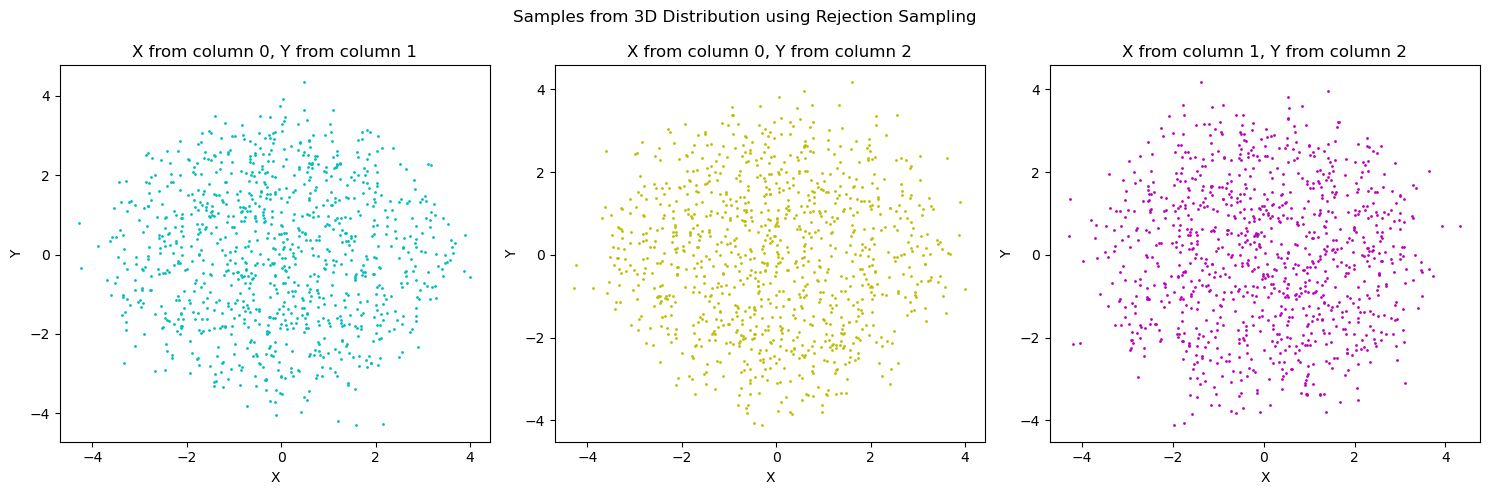

In [103]:
samples_ND=np.array(samples_ND)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(samples_ND[:, 0], samples_ND[:, 1], s=1, color='c')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('X from column 0, Y from column 1')

axes[1].scatter(samples_ND[:, 0], samples_ND[:, 2], s=1, color='y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('X from column 0, Y from column 2')

axes[2].scatter(samples_ND[:, 1], samples_ND[:, 2], s=1, color='m')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].set_title('X from column 1, Y from column 2')

fig.suptitle('Samples from {}D Distribution using Rejection Sampling'.format(dim))

plt.tight_layout()
plt.show()